# Data Analytics II
1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [40]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [42]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [43]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [44]:
df.shape

(400, 5)

<Axes: >

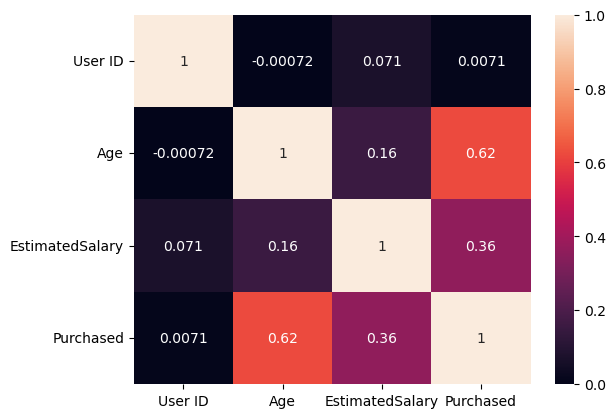

In [45]:
sns.heatmap(data=df.corr(),annot=True)

#### In entire correlation matrix:
- Age is strongly have positive correlation with Purchased (0.62)

# Logistic Regression

- Loading 'Age', 'EstimatedSalary' as the features in 'x' => independent variables
- Loading 'Purchased' as the target variable in 'y' => dependent variable

In [46]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


- Seperate the target variable(df_Y) and other values(df_X)

In [47]:
df_X = df[["Age","EstimatedSalary"]]
df_Y = df["Purchased"]

In [48]:
df_X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [49]:
df_Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Spliting data into 75% training and 25% testing data

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=25, random_state=42)

## StandardScaler to standardize the values
- Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
- The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [51]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

#fit_transform() => is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
#The fit method is calculating the mean and variance of each of the features present in our data. 
#The transform method is transforming all the features using the respective mean and variance. 

x_train = scale.fit_transform(x_train)

#transform() => this method we can use the same mean and variance as it is calculated from our training data to transform our test data.

x_test = scale.transform(x_test)


## Training and testing the model
### Using scikit-learn’s LogisticRegression to train model on both the training and test sets

In [52]:
from sklearn.linear_model import LogisticRegression

logi_model = LogisticRegression(random_state = 0,solver = 'lbfgs')
logi_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

# Testing the model


In [53]:
# Predicting price y_pred values for x_test data => then compare with actual y_test values

y_pred = logi_model.predict(x_test)

print(x_test)
print('-'*25)
print(y_pred)

[[ 0.81216266 -1.41162046]
 [ 2.06868216  0.5108803 ]
 [-0.92763358 -0.77078687]
 [ 1.00547335  0.7439107 ]
 [-0.83097823 -1.23684766]
 [-0.73432289 -0.24646848]
 [ 0.90881801  1.06432749]
 [-0.83097823  0.36523631]
 [ 0.23223058  0.13220591]
 [ 0.42554127 -0.15908208]
 [-0.25104615 -0.15908208]
 [ 1.48875008 -1.06207486]
 [-1.41091031 -0.65427167]
 [-1.70087635 -1.38249166]
 [-0.73432289  0.4817515 ]
 [-0.25104615  1.09345629]
 [ 1.39209474 -0.94555967]
 [ 0.81216266  0.10307711]
 [ 0.13557523 -0.82904447]
 [ 1.77871612 -0.30472608]
 [-1.50756566 -1.26597646]
 [-0.83097823  0.27784991]
 [ 0.90881801 -1.38249166]
 [ 2.06868216  0.16133471]
 [-1.7975317  -1.49900685]]
-------------------------
[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]


In [54]:
print('Expected Output:',y_pred)
print('-'*15)
print('Predicted Output:\n',y_test)

Expected Output: [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0]
---------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    0
231    0
385    1
77     0
15     0
391    1
271    1
0      0
Name: Purchased, dtype: int64


In [55]:
#comparison between the actual value of "Purchased" (y_test) and its value prediced by machine (y_pred)
#pred_col = tuple(y_test)
#pred_col

#print("Purchased values by Logistic Regression")
#new_df = pd.DataFrame(pred_col,columns=["Actual"])
#new_df["Predicted"] = y_pred
#new_df

# Model Evaluation and accuracy (accuracy optional)

In [56]:
#After the model training and testing
#Print the coefecients/weights for each feature/column of our model
print(pd.DataFrame(logi_model.coef_))
#print(lin_model.coef_)

          0         1
0  2.178318  1.151336


In [57]:
print("Training model accuracy is:")
logi_model.score(x_train, y_train)

Training model accuracy is:


0.832

In [58]:
print("Testing model accuracy is:")
logi_model.score(x_test, y_test)

Testing model accuracy is:


0.92

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

print("Prediction model accuracy is:"+"\n")

#calculations of mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mead squared Error is:",rmse)
r2 = r2_score(y_test, y_pred)
print("R2 score is:",r2)

Prediction model accuracy is:

Mean Squared Error is: 0.08
Root Mead squared Error is: 0.282842712474619
R2 score is: 0.6323529411764706


# Evaluating the model based on confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred)
print(matrix)

tp,fn,fp,tn = confusion_matrix(y_test, y_pred).reshape(-1)

[[16  1]
 [ 1  7]]


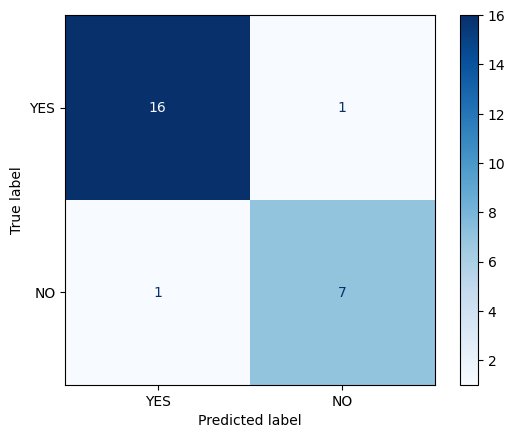

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = matrix,display_labels=["YES","NO"])
conf_matrix.plot(cmap=plt.cm.Blues)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.88      0.88         8

    accuracy                           0.92        25
   macro avg       0.91      0.91      0.91        25
weighted avg       0.92      0.92      0.92        25



In [84]:
print("TP :",tp)
print("TN :",tn)
print("FP :",fp)
print("FN :",fn)

TP : 16
TN : 7
FP : 1
FN : 1


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Accuracy = accuracy_score(y_test, y_pred)
# Accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy :",Accuracy)

Error = (fp+fn)/(tp+tn+fp+fn)
# Error = (fp+fn)/(tp+tn+fp+fn)
print("Error :",Error)

Precision = precision_score(y_test, y_pred)
#Precision = tp/(tp+fp)
print("Precision :",Precision)

Recall = recall_score(y_test, y_pred)
# Recall = tp/(tp+fn)
print("Sensitivity (Recall) :",Recall)

Specificity = tn/(fp+tn)
print("Specificity (True negative value) :",Specificity)

Falsy = fp/(fp+tn)
print("False positive value :",Falsy)

Accuracy : 0.92
Error : 0.08
Precision : 0.875
Sensitivity (Recall) : 0.875
Specificity (True negative value) : 0.875
False positive value : 0.125


In [99]:
total = tp+tn+fp+fn

Accuracy = (tp+tn)/total
print("Accuracy :",Accuracy)
Error = (fp+fn)/total
print("Error :",Error)
Precision = tp/(tp+fp)
print("Precision :",Precision)
Recall = tp/(tp+fn)
print("Sensitivity (Recall) :",Recall)
Specificity = tn/(fp+tn)
print("Specificity (True negative value) :",Specificity)
Falsy = fp/(fp+tn)
print("False positive value :",Falsy)

Accuracy : 0.92
Error : 0.08
Precision : 0.9411764705882353
Sensitivity (Recall) : 0.9411764705882353
Specificity (True negative value) : 0.875
False positive value : 0.125
